# Research assignment 3

Hunter Prout 

Project Educ Dataset 

2/25/24

## 1. Build your hypothesis

Write bullet points that answer the following questions:

    A. What is your depedent variable? For this assignment, your depedent should be a continuous variable. Describe how your depedent variable is measured. If your data doesn't allow this, you can use either the General Social Survey 2018 or the Grant and Loan Repayment data. 
    
- I am most interested in the impact that being Black and having different levels of education has on general happiness. My dependent variable is general happiness. This is a nominal variable that is measured based on 3 categories of "Very Happy" "pretty happy" and "Not too happy" 
    
    B. What are the indepedent variables you are most interested in? Are they interval ratio or nominal? Why?
    
- My independent variables are: Race and sex. Race and Sex are nominal and categorical because there is no inter-range for race or sex in this dataset. These are my independent variables because they will help me find the effect of race and education on happiness

    C. What are your control variables? Are they interval ratio or nominal? Why?
    
My Control variables are education,income, and age. Education is a ratio variable that is measured in years of scholling completed this is an interveining varibale that I will use to find the impact of education on happiness. Income is a ratio variable measured in dollars ranging from less than 1000 dollars to over 25,000 dollars (The data does not indicate over what time period income is being measured in dollars, ex. "less than 1000 dollars a month". Age is a ratio varible measured in years old. Income is a ratio variable measured in (Assuming for the project) dollars per month. Income may also interviene in a weird way due to the tendency for people with higher years of education completed to have more income. I included age and income in my control variable because it may cause spurriousness in the relationship between happiness and race, sex, and education; people who make more money are likley more happy, people who significantly vary in age may have vastly different meanings of happiness, there is also discrimination in pay and in schools due to age. 

    D. What are your hyphotheses on the relationships between your dependent and independent variables (including control variables)? Make seperate hypotheses for separate independent variables and for intervening relationships that involve multiple independent variables of interest.
    
A. I hypothesize that Black respondent's general happiness will have a positive correlation with years of education completed. 

B. I hypothesize that Black female respondent's general happiness will be lower than Black male respondent's general happiness while controling for age and income.  




## 2. Prepare your data

Do the following:

    A. Set current directory

    B. Set more off

    C. Creat log file
    
    D. Load only variable from the dataset that you will use

    E. Use -describe- and -codebook- to see details of the varaibles

In [1]:
cd "/Users/hunter/Desktop/SOC 211 Stats"

/Users/hunter/Desktop/SOC 211 Stats


In [2]:
set maxvar 120000

In [3]:
set more off

(-set more- irrelevant in this version of Stata)


In [4]:
log using "Research Assignment 3.log", replace 

-------------------------------------------------------------------------------
      name:  <unnamed>
       log:  /Users/hunter/Desktop/SOC 211 Stats/Research Assignment 3.log
  log type:  text
 opened on:  27 Feb 2024, 03:30:21


In [2]:
use id year sex race educ age happy rincome using "/Users/hunter/Desktop/SOC 211 Stats/GSS7218_R1.dta"

In [3]:
describe 


Contains data from /Users/hunter/Desktop/SOC 211 Stats/GSS7218_R1.dta
 Observations:        64,814                  
    Variables:             8                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 GSS year for this respondent
id              int     %8.0g                 Respondent ID number
age             byte    %8.0g      AGE        Age of respondent
educ            byte    %8.0g      LABK       Highest year of school completed
sex             byte    %8.0g      SEX        Respondents sex
race            byte    %8.0g      RACE       Race of respondent
rincome         byte    %8.0g      LABU       Respondents income
happy           byte    %8.0g      LABBK      General happiness
--------------------------------

In [4]:
tab sex


Respondents |
        sex |      Freq.     Percent        Cum.
------------+-----------------------------------
       male |     28,614       44.15       44.15
     female |     36,200       55.85      100.00
------------+-----------------------------------
      Total |     64,814      100.00


In [6]:
codebook


-------------------------------------------------------------------------------
year                                              GSS year for this respondent 
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1972,2018]                   Units: 1
         Unique values: 32                        Missing .: 0/64,814

                  Mean: 1994.94
             Std. dev.: 13.4654

           Percentiles:     10%       25%       50%       75%       90%
                           1976      1984      1996      2006      2014

-------------------------------------------------------------------------------
id                                                         Respondent ID number
-------------------------------------------------------------------------------

                  Type: Numeric (int)

                 Range: [1,4510]                      Units: 1
         Unique values: 4,510   

## 3. Use scatterplots to visually assess relationships between your dependent variable and all of your independent variables

    A. Quietly generate scatterplots for the dependent variable and each independent variable (including contol variables). Then use graph combine to examine all of the scatter plots.

    B. Write a paragraph interpreting what the scatterplots show
    
  - These scatter plots show the relationship between happiness and each varible listed in the plot. When the red line is slanted, it is indicating some sort of a relationship. Happiness has a slight correlation with highest year of school completed, income, and race. The relationships that might exist in any of these scatterplots is very slight snd almost insignificant. This would suggest that the independent variables are genrally not very strongly related to or explainig the variation in my dependent variable. 

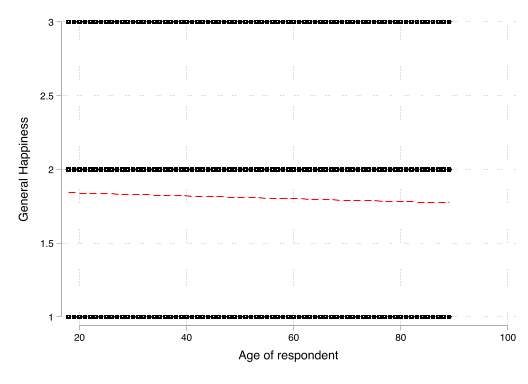

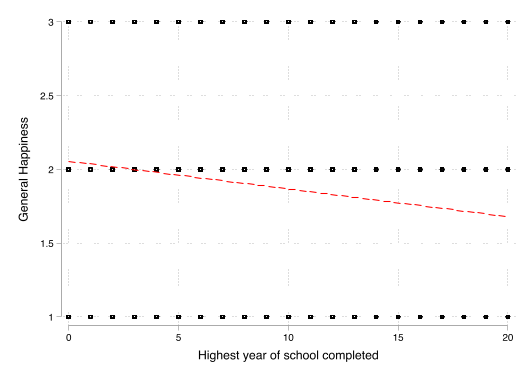

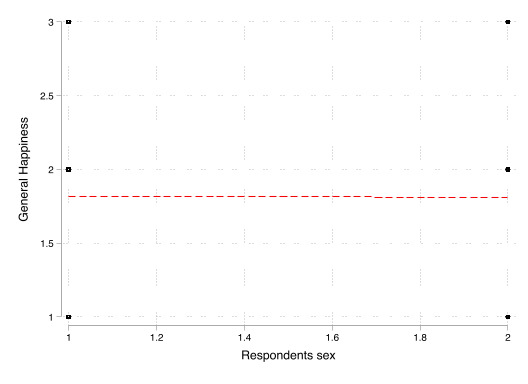

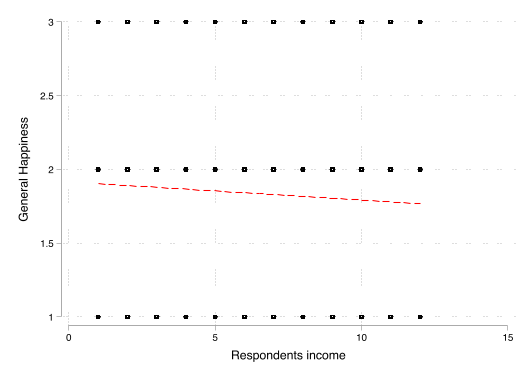

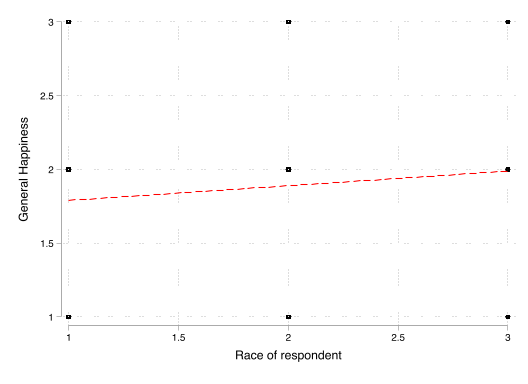

In [8]:
foreach x in age educ sex rincome race {
quietly  graph twoway (scatter happy `x') (lfit happy `x', color(red)), ///
    name(`x', replace) legend(off) ytitle(General Happiness) scheme(plotplainblind)
}

In [9]:
%set graph_width = 11

graph size was (5.5in, 4in), is now (11, 4in).


In [10]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


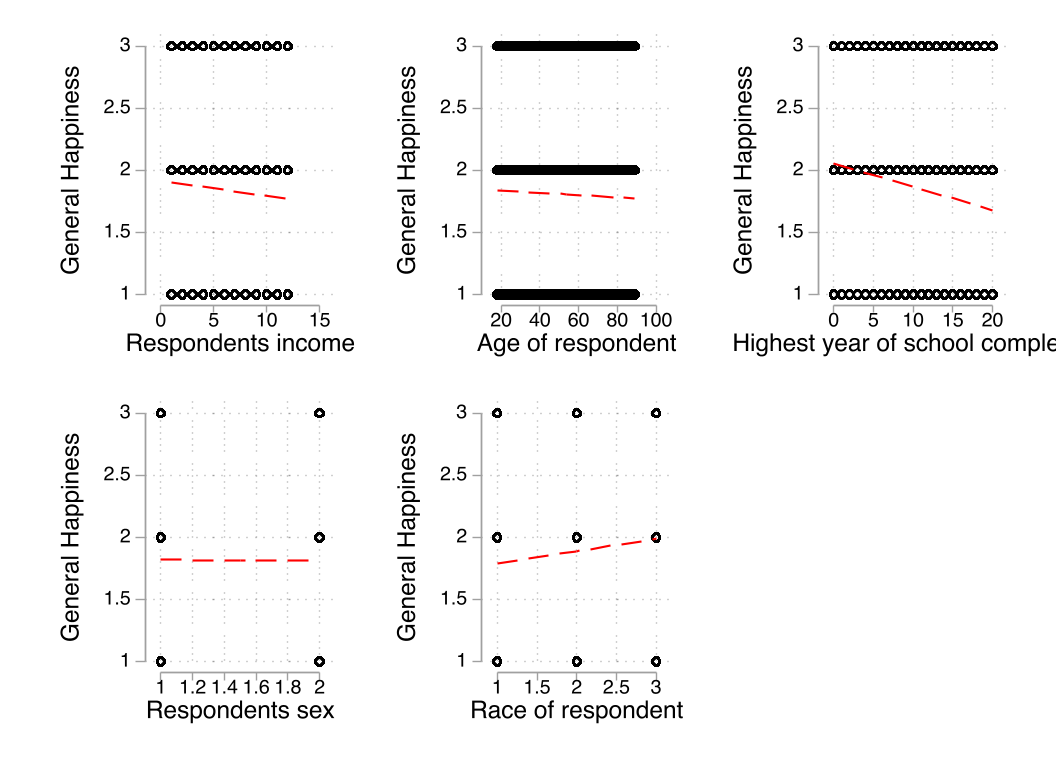

In [11]:
graph combine rincome age educ sex race, col(3) scheme(plotplainblind) xsize(4)

## 4. Assess multicorrelation among your independent variables

    A. Create a correlation matrix for all of your variables.

    B. . Write bullet points or a short paragraph summarizing what the matrix shows.
    
As indicated in the scatter plots above, there are no real significant correlations between any of my independent variables and my dependent variable. Relative to the low scores, race has the highest correlation to happiness of the listed varibles. I think that this is the case becasue there is not a lot of range or possibility for variation in my dependent variables (it only goes from 1-3). This does reveal a weak correlation between respondent's income and their years of education completed. 

In [12]:
pwcorr happy race sex educ age rincome


             |    happy     race      sex     educ      age  rincome
-------------+------------------------------------------------------
       happy |   1.0000 
        race |   0.0844   1.0000 
         sex |  -0.0074   0.0196   1.0000 
        educ |  -0.0938  -0.0787  -0.0346   1.0000 
         age |  -0.0265  -0.1102   0.0348  -0.1760   1.0000 
     rincome |  -0.0681  -0.0133  -0.2114   0.2889   0.1634   1.0000 


## 5. Describe at least 2 OLS models to test your hypotheses

Write a paragraph or a set of bullet points that explain:

    A. Which model tests which of your hypotheses
    
HA - M1
HB - M2

    
    B. Which variables are included in each model
M1-  happy, race, educ
M2 - happy, race,educ, sex | control for age, and income 

    B. How/why adding particular variables to subsequent models will test for spurious or intervening relationships

## 6. Write OLS regression equations for each model

Use subscripts to indicate which symbols represesent your different independent variables. To do so, you can copy and paste the LaTex code in this week's lesson notebook and edit the subscripts.

Model 1: 

$\hat{Y} = \alpha + \beta \times x $

$\hat{Y} = \alpha + \beta_b \cdot x_b + \beta_e \cdot x_e + \beta_o \cdot x_o $

$\hat{Y}$ is the respondents general happiness 

$\alpha$ is the intercept term 

$x_b$ is black respondents

$x_e$ is Years of education 

$x_o$ is other race respondents 

Model 2: 

$\hat{Y} = \alpha + \beta \times x $

$\hat{Y} = \alpha + \beta_b \cdot x_b + \beta_e \cdot x_e + \beta_a \cdot x_a + \beta_i \cdot x_i + \beta_o \cdot x_o + \beta_m \cdot x_m $

$\hat{Y}$ is the respondents general happiness 

$\alpha$ is the intercept term 

$x_b$ is black respondents

$x_e$ is Years of education 

$x_a$ is Age

$x_i$ is income 

$x_o$ is other race respondents 

$x_o$ is male 


## 7. Estimate your models with stata

    A. Write Stata code to estimate the models and store the regression results
    
    B. Write code to output the estimates in a table within Jupyter Notebook and as an RTF file

In [13]:
est clear 

*Model 1 
quietly eststo: reg happy educ i.race

*Model 2 
quietly eststo: reg happy educ i.sex i.race age rincome

In [14]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "Years of education completed" 2.race "black" 3.race "other race" 2.sex "female") noconstant


--------------------------------------------
                      (1)             (2)   
                  Model 1         Model 2   
                     b/se            b/se   
--------------------------------------------
Years of e~d       -0.017***       -0.014***
                  (0.001)         (0.001)   
black               0.187***        0.176***
                  (0.008)         (0.010)   
other race          0.078***        0.056***
                  (0.012)         (0.014)   
female                             -0.025***
                                  (0.007)   
age                                -0.002***
                                  (0.000)   
rincome                            -0.008***
                                  (0.001)   
--------------------------------------------
R-Squared           0.019           0.021   
N               59910.000       34813.000   
--------------------------------------------


In [15]:
quietly esttab using researchassignment3_tables.rtf, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
  nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
  coeflabels (educ "Years of education completed" 2.race "black" 3.race "other race" 2.sex "female") noconstant rtf replace

## 8. Summarize the results for your hypotheses

    A. Which of your hypotheses are supported and which are rejected by the (in)consistency of coefficients across all of your models?
    
Unfortunately, both of my hypotheses are rejected by the coefficents and relation of the variables that I hypothesized about. Across my models, there was not enough significance and statistical relation between my variables. 

    B. Which of your hypotheses regarding intervening or spurious relationships are supported / rejected by similarities / differences in coefficients across all of your models?
    
My hypothesis reguarding interviening or spurrious variables was also rejected. The coefficent of determination was very very low, indicating that my variables are not responsible for explaining a change in oneanother. However, I did find it interesting that my r squared began to rise as I added female, age, and income to the equation. I expcted these varibales to easily and cearly explain happyness, I am supprised by the low r squared. 

    C. What ideas do you have for why any of your hypotheses were rejected? Are there additional omitted variables do you think you should include to test your hypotheses that might change your results? Why?
    
   There are a lof of reasons as to why my hypotheses failed. There are a lot of variables in my dataset in general, meaning that there are a lot of potential variabels to consider that might constribute to general happiness. in this GSS survey, only 6~,xxx participants were surveyed. Only about 9,000 of the respondents were Black, this creates another obsticle as I am interested in Black respondents. Some of the variables that I would have liked to use for education in this GSS dataset like major or type of school attended had majority missing data. I should go back and include a lot more of the variables on the list to watch how my rsquared will change as I add variables that I think are relvant to my topic. I think that I should avoid using this data set going forward for studying Black people because of the massive racial imballance in survey responses. 